In [60]:
import keras

In [61]:
model = keras.models.load_model('./Model/six-shoes-model.h5')

### 실제 데이터 가져오기 - 타겟 아닌 것만

In [62]:
from PIL import Image

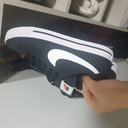

In [63]:
img = Image.open('./Data/real/test.jpeg')
img

In [64]:
import numpy as np 

def png_to_jpg(img , fileName):
    img = img.resize((128,128))
    image = Image.new("RGBA",img.size,"WHITE")
    image.paste(img, mask=img)
    image.convert("RGB").save(f"./Data/{fileName}.jpg")
    print(np.array(image).shape)

In [ ]:
# # png 일경우에만
# png_to_jpg(img,'test_5')
# img = Image.open('./Data/test_5.jpg')

In [65]:
img = img.resize((128,128))
imgArr = np.array(img,dtype=np.uint8)

In [66]:
imgArr = 255 - imgArr

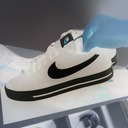

In [67]:
img = Image.fromarray(imgArr)
# img = img.transpose(Image.FLIP_LEFT_RIGHT)
img = img.transpose(Image.FLIP_TOP_BOTTOM)
img

In [68]:
imgArr = np.array(img,dtype=np.int32)

In [69]:
imgScaled = imgArr / 255.0

In [70]:
imgScaled.shape

(128, 128, 3)

In [71]:
imgScaled = imgScaled.reshape(-1,128,128,3)

In [75]:
ans = ['Adidas','Adidas','Converse','Converse','Nike','Nike']

1/1 [==============================] - 0s 12ms/step
예측력 :  [[2.2356914e-02 2.1060397e-12 9.6354800e-09 1.4061238e-06 9.7764164e-01
  2.6304956e-11]]
제일 높은 예측력 :  Nike


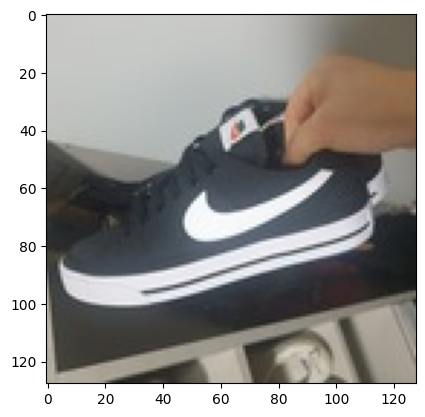

In [86]:
import matplotlib.pyplot as plt
value = model.predict(imgScaled)
print("예측력 : " ,value)
print("제일 높은 예측력 : ", ans[np.argmax(value)])

img = Image.open('./Data/real/test.jpeg')
img = img.transpose(Image.FLIP_TOP_BOTTOM)

plt.imshow(img)

plt.show()